# Graph format

The EDeN library allows the vectorization of graphs, i.e. the transformation of graphs into sparse vectors.

The graphs that can be processed by the EDeN library have the following restrictions:
- the graphs are implemented as *networkx* graphs
- nodes and edges have identifiers: the following identifiers are used as reserved words
    1. label
    2. weight
    3. vec or svec
    4. nesting
    
- nodes and edges **must** have the 'label' attribute 
- the 'label' attribute can be of one of the following python types: 
    1. string 
    2. list 
    3. dictionary
    
 strings are used to represent categorical values; 
 
 lists are used to represent dense vectors;
 
 dictionaries are used to represent sparse vectors: keys are of string type and values are of type float;
 
 
- nodes and edges **can** have a 'weight' attribute of type float 
- nodes **can** have a 'vec' attribute of type list of reals 
- nodes **can** have a 'svec' attribute of type dictionary of reals 
- nesting edges **must** have a 'nesting' attribute of type boolean set to True

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from eden.util import configure_logging
import logging
logger = logging.getLogger()
configure_logging(logger,verbosity=1)

In [2]:
import pylab as plt
import networkx as nx

In [3]:
G=nx.Graph()
G.add_node(0, label='A')
G.add_node(1, label='B')
G.add_node(2, label='C')

G.add_edge(0,1, label='x')
G.add_edge(1,2, label='y')
G.add_edge(2,0, label='z')

In [4]:
from eden.display import serialize_graph
print serialize_graph(G)

{
    "directed":false,
    "graph":[],
    "nodes":[
        {
            "id":0,
            "label":"A"
        },
        {
            "id":1,
            "label":"B"
        },
        {
            "id":2,
            "label":"C"
        }
    ],
    "links":[
        {
            "source":0,
            "target":1,
            "label":"x"
        },
        {
            "source":0,
            "target":2,
            "label":"z"
        },
        {
            "source":1,
            "target":2,
            "label":"y"
        }
    ],
    "multigraph":false
}


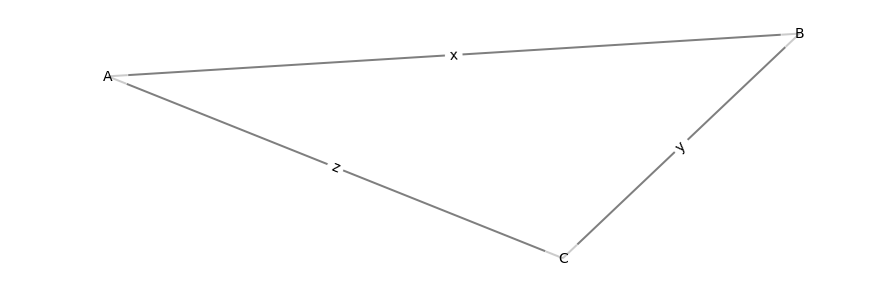

In [5]:
from eden.display import draw_graph
draw_graph(G,  size=15, vertex_size=1500, font_size=14, vertex_border=True, size_x_to_y_ratio=3)

In [6]:
G=nx.Graph()
G.add_node(0, label='A', vec=[0,0,.1])
G.add_node(1, label='B', vec=[0,.1,0])
G.add_node(2, label='C', vec=[.1,0,0])

G.add_edge(0,1, label='x')
G.add_edge(1,2, label='y')
G.add_edge(2,0, label='z')

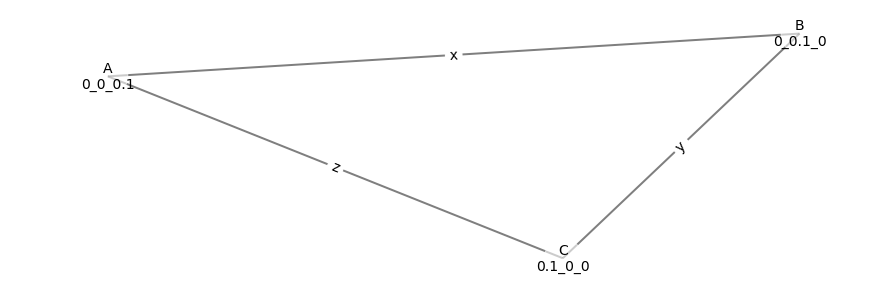

In [7]:
draw_graph(G, secondary_vertex_label='vec', size=15, vertex_size=1500, font_size=14, vertex_border=True, size_x_to_y_ratio=3)

In [8]:
G=nx.Graph()
G.add_node(0, label='A', svec={'A':1, 'B':2, 'C':3})
G.add_node(1, label='B', svec={'A':1, 'B':2, 'D':3})
G.add_node(2, label='C', svec={'A':1, 'D':2, 'E':3})

G.add_edge(0,1, label='x')
G.add_edge(1,2, label='y')
G.add_edge(2,0, label='z')

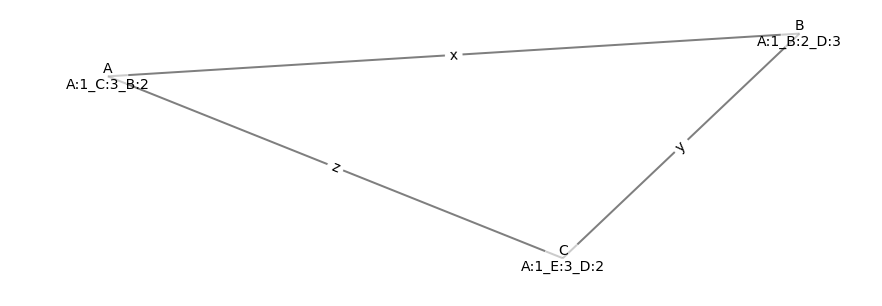

In [9]:
draw_graph(G, secondary_vertex_label='svec',  size=15, vertex_size=1500, font_size=14, vertex_border=True, size_x_to_y_ratio=3)

In [10]:
G=nx.Graph()
G.add_node(0, label='A', weight=.5)
G.add_node(1, label='B', weight=1)
G.add_node(3, label='D', weight=1)
G.add_node(4, label='E', weight=1)
G.add_node(5, label='F', weight=.01)

G.add_edge(0,1, label='x', weight=.75)
G.add_edge(1,3, label='z', nesting=True, weight=.5)
G.add_edge(0,3, label='z', nesting=True, weight=.1)
G.add_edge(3,4, label='k')
G.add_edge(3,5, label='j')

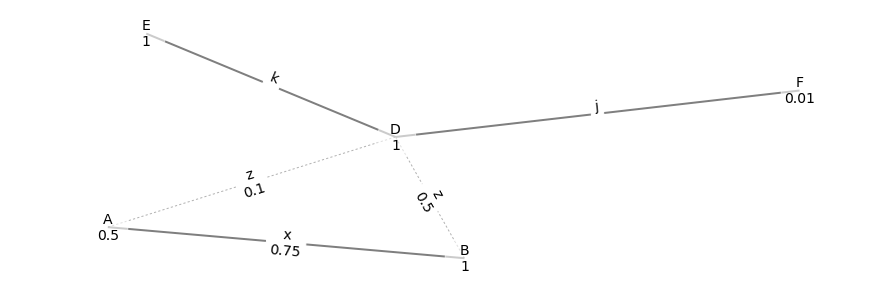

In [11]:
draw_graph(G, secondary_vertex_label='weight', secondary_edge_label='weight', size=15, vertex_size=1500, font_size=14, vertex_border=True, size_x_to_y_ratio=3)

Build graphs and then display them

In [12]:
import networkx as nx
graph_list = []

In [13]:
G=nx.Graph()
G.add_node(0, label='A')
G.add_node(1, label='B')
G.add_node(2, label='C')
G.add_edge(0,1, label='a')
G.add_edge(1,2, label='b')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label='A')
G.add_node(1, label='B')
G.add_node(2, label='X')
G.add_edge(0,1, label='a')
G.add_edge(1,2, label='b')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label='A')
G.add_node(1, label='B')
G.add_node(2, label='X')
G.add_edge(0,1, label='x')
G.add_edge(1,2, label='x')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label='X')
G.add_node(1, label='X')
G.add_node(2, label='X')
G.add_edge(0,1, label='x')
G.add_edge(1,2, label='x')
graph_list += [G.copy()]

In [14]:
G=nx.Graph()
G.add_node(0, label='A', vec=[1,0,0])
G.add_node(1, label='B', vec=[0,1,0])
G.add_node(2, label='C', vec=[0,0,1])
G.add_edge(0,1, label='a')
G.add_edge(1,2, label='b')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label='A', vec=[1,1,0])
G.add_node(1, label='B', vec=[0,1,1])
G.add_node(2, label='C', vec=[0,0,1])
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label='A', vec=[1,0.1,0.2])
G.add_node(1, label='B', vec=[0.3,1,0.4])
G.add_node(2, label='C', vec=[0.5,0.6,1])
G.add_edge(0,1, label='a')
G.add_edge(1,2, label='b')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label='A', vec=[0.1,0.2,0.3])
G.add_node(1, label='B', vec=[0.4,0.5,0.6])
G.add_node(2, label='C', vec=[0.7,0.8,0.9])
G.add_edge(0,1, label='a')
G.add_edge(1,2, label='b')
graph_list += [G.copy()]

In [15]:
G=nx.Graph()
G.add_node(0, label='A', svec={'A':1, 'B':1, 'C':1})
G.add_node(1, label='B', svec={'a':1, 'B':1, 'C':1})
G.add_node(2, label='C', svec={'a':1, 'b':1, 'C':1})
G.add_edge(0,1, label='a')
G.add_edge(1,2, label='b')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label='A', svec={'A':1,  'C':1, 'D':1})
G.add_node(1, label='B', svec={'a':1,  'C':1, 'D':1})
G.add_node(2, label='C', svec={'a':1,  'C':1, 'D':1})
G.add_edge(0,1, label='a')
G.add_edge(1,2, label='b')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label='A', svec={'A':1, 'D':1, 'E':1})
G.add_node(1, label='B', svec={'a':1, 'D':1, 'E':1})
G.add_node(2, label='C', svec={'a':1, 'D':1, 'E':1})
G.add_edge(0,1, label='a')
G.add_edge(1,2, label='b')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label='A', svec={'A':1, 'B':1, 'C':1, 'D':1, 'E':1})
G.add_node(1, label='B', svec={'a':1, 'B':1, 'C':1, 'D':1, 'E':1})
G.add_node(2, label='C', svec={'a':1, 'b':1, 'C':1, 'D':1, 'E':1})
G.add_edge(0,1, label='a')
G.add_edge(1,2, label='b')
graph_list += [G.copy()]

Create a vector representation

In [16]:
%%time
from eden.graph import vectorize
X = vectorize(graph_list, complexity=2, nbits=16, discrete=False)
y=[1]*4+[2]*4+[3]*4
print 'Instances: %d \nFeatures: %d with an avg of %d features per instance' % (X.shape[0], X.shape[1],  X.getnnz()/X.shape[0])

Instances: 12 
Features: 65537 with an avg of 101 features per instance
CPU times: user 100 ms, sys: 196 ms, total: 296 ms
Wall time: 1.11 s


embed the high dimensional vector in 2D using PCA and plot the instances

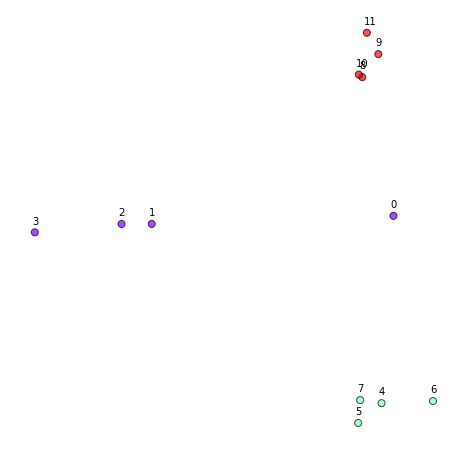

In [17]:
import pylab as plt
def plot(X,y):
    size=8
    cmap = 'rainbow'
    plt.figure(figsize=(size, size))    
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.scatter(X[:, 0], X[:, 1], alpha=0.7, c=y, cmap=cmap, s=50, edgecolors='k')
    for i in range(X.shape[0]):
        plt.annotate(str(i), (X[i, 0], X[i, 1]), xytext=(-3, 8), textcoords='offset points')
    plt.show()

from sklearn.decomposition import TruncatedSVD
Xd = TruncatedSVD(n_components=2).fit_transform(X)
plot(Xd,y)

Compute pairwise similarity matrix

In [18]:
from sklearn import metrics
K=metrics.pairwise.pairwise_kernels(X, metric='linear')

In [19]:
from ipy_table import * 
def prep_table(K):    
    header = [' ']
    header += [i for i in range(K.shape[0])]
    mat = [header]
    for id, row in enumerate(K):
        new_row = [id]
        new_row += list(row)
        mat.append(new_row)
    return mat

mat=prep_table(K)
make_table(mat)
apply_theme('basic')
set_global_style(float_format = '%0.2f')

ImportError: No module named ipy_table

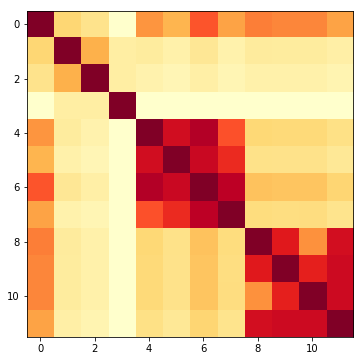

In [20]:
%matplotlib inline

import pylab as plt
plt.figure( figsize=(6,6) )
img = plt.imshow( K, interpolation='none', cmap=plt.get_cmap( 'YlOrRd' ) )
plt.show()

---